In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('GermanData.csv')

In [4]:
# Split data into months, no month name - simply labeled 0-11
data['Month'] = 0
k = -1
for i in range(len(data)):
    if (i % 30 == 0):
        k += 1
    data['Month'][i] = k % 12

# Should equal one - To check above algorithm has completed
data['Month'][31]

1

In [5]:
# List of headers
headers = list(data)

# Create dataframes for each month
one = pd.DataFrame(columns = headers)
two = pd.DataFrame(columns = headers)
three = pd.DataFrame(columns = headers)
four = pd.DataFrame(columns = headers)
five = pd.DataFrame(columns = headers)
six = pd.DataFrame(columns = headers)
seven = pd.DataFrame(columns = headers)
eight = pd.DataFrame(columns = headers)
nine = pd.DataFrame(columns = headers)
ten = pd.DataFrame(columns = headers)
eleven = pd.DataFrame(columns = headers)
twelve = pd.DataFrame(columns = headers)

# Create list of dataframes to allow easy looping later
dfs = [one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve]

In [6]:
# Move data onto monthly dataframes
for i in range(25568):
            dfs[data['Month'][i]] = dfs[data['Month'][i]].append(data.iloc[i], ignore_index = True)


In [7]:
# Replace all missing values with np NAN to allow mean calculation without these
for i in range(12):
    dfs[i] = dfs[i].replace([-9999], np.nan)

for i in range(12):
    # Calculate mean for each site
    dfs[i].loc['mean'] = round(dfs[i].mean())
    
    # Replace all Nan with mean value for site
    for head in headers:
        dfs[i][head] = dfs[i][head].replace([np.nan], dfs[i].loc['mean'][head])
        
    # Drop Mean row and Month column to simplify data for csv conversion
    dfs[i] = dfs[i].drop(['mean'])
    dfs[i] = dfs[i].drop(['Month'], axis = 1)
    
    # Push data to file, remove index and header
    dfs[i].to_csv('month'+str(i)+'.csv', index = False, header = None)

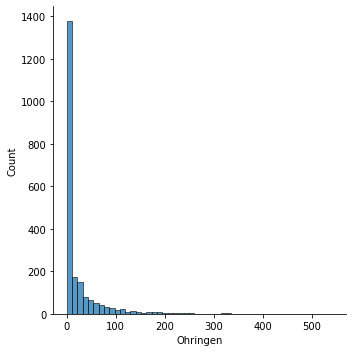

In [8]:
sns.displot(dfs[11]['Ohringen'], bins=50)